Import basic tools and Dance Object, used for turning joint-position data into a dataframe of features

In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.append("../../")
from DanceProj1.DanceObjScratch import Dance

Use Dance class obj on data and make feature-dataframe. See data_proc.py for details.

In [2]:
from DanceProj1.data_proc import get_data

aistpath = '../../aist_keypoints' #path to 3d keypoints data
dataBM, dataFM = get_data(aistpath)    #get data. Comes with joint-position-frame arrays and an id

Make sure data is loaded

In [3]:
print('data is dict with keys = genres', dataBM.keys())
print('values are tuples (pairs) = (posdata, id)')
print('first break piece data shape (frames, joints, xyz):', dataBM['Break'][0][0].shape)
print('id of first break piece: ', dataBM['Break'][0][1])

data is dict with keys = genres dict_keys(['Break', 'Pop', 'Lock', 'Midhop', 'LAhop', 'House', 'Waack', 'Krump', 'Street Jazz', 'Ballet Jazz'])
values are tuples (pairs) = (posdata, id)
first break piece data shape (frames, joints, xyz): (15, 443, 3)
id of first break piece:  gBR_sBM_cAll_d05_mBR5_ch10


Turn the data into Dance objects. This is a class that has methods for computing features. See DanceObj.py for details - it is contained in data_to_features.

In [4]:
from DanceProj1.data_proc import data_to_features

dfBM, dfFM = data_to_features(dataBM, dataFM, sparse=False)

there were index errors on 0 dances


In [5]:
print('There are', len(dfFM.index), 'Advanced sequences and', len(dfBM.index), 'Basic sequences')

There are 199 Advanced sequences and 1199 Basic sequences


Check the dataframes

In [6]:
print('There are ', len(dfBM.columns)-2, 'features, plus the genre and id columns')
dfBM.head()

There are  300 features, plus the genre and id columns


id  Genre  wristacceleration  wristaccstd  \
0  gBR_sBM_cAll_d05_mBR5_ch10  Break         147.424021    88.787879   
1  gBR_sBM_cAll_d05_mBR1_ch03  Break         413.547603   268.562169   
2  gBR_sBM_cAll_d06_mBR3_ch09  Break         365.190907   222.766754   
3  gBR_sBM_cAll_d06_mBR2_ch08  Break         425.767409   231.297827   
4  gBR_sBM_cAll_d05_mBR4_ch10  Break         165.426652   110.913805   

   ankleacceleration  ankleaccstd  angularmomentumxz  angularmomentumy  \
0         318.962386   250.883127         925.392047       -567.378827   
1         313.218737   136.682169       -1534.771429        902.808415   
2         320.970867   223.629090        -679.871530       4267.835425   
3         368.445909   287.946463        1204.119479        -10.956133   
4         283.075792   215.987937         631.332889       -505.157613   

   angularmomentumxzstd  angularmomentumystd  ...  peak2_ywrists  \
0           4046.137286          2972.010425  ...       0.494357   
1           5323.030246          1358.511140  ...       0.125000   
2           3159.626132          3289.583241  ...       0.498092   
3           5606.692007          6977.001949  ...       0.248264   
4           5016.263532          2715.459404  ...       0.497917   

   prominence2_ywrists  peak3_ywrists  prominence3_ywrists  peak1_xzwrists  \
0             0.760096       0.121896             0.891837        0.243792   
1             1.618455       0.185938             1.447074        0.248438   
2             0.601767       0.169847             0.383004        0.246183   
3             1.059228       0.373264             0.840976        0.081597   
4             0.763967       0.120833             0.805630        0.247917   

   prominence1_xzwrists  peak2_xzwrists  prominence2_xzwrists  peak3_xzwrists  \
0              0.896995        0.117381              0.659142        0.480813   
1              1.141960        0.125000              1.052548        0.496875   
2              0.993324        0.496183              0.628374        0.091603   
3              1.466065        0.248264              1.268394        0.166667   
4              1.168166        0.495833              0.745282        0.102083   

   prominence3_xzwrists  
0              0.332726  
1              0.738367  
2              0.561370  
3              1.222368  
4              0.685338  

[5 rows x 302 columns]

In [7]:
print(dfFM['Genre'].unique())

['Break' 'Pop' 'Lock' 'Midhop' 'LAhop' 'House' 'Waack' 'Krump'
 'Street Jazz' 'Ballet Jazz']


In [8]:
#make advanced dataframes for each genre
dfABJazz = dfFM[dfFM['Genre'] == 'Ballet Jazz'].drop(['Genre', 'id'], axis=1)
dfABreak = dfFM[dfFM['Genre'] == 'Break'].drop(['Genre', 'id'], axis=1)
dfAPop = dfFM[dfFM['Genre'] == 'Pop'].drop(['Genre', 'id'], axis=1)
dfALock = dfFM[dfFM['Genre'] == 'Lock'].drop(['Genre', 'id'], axis=1)
dfAMidhop = dfFM[dfFM['Genre'] == 'Midhop'].drop(['Genre', 'id'], axis=1)
dfALAhop = dfFM[dfFM['Genre'] == 'LAhop'].drop(['Genre', 'id'], axis=1)
dfAHouse = dfFM[dfFM['Genre'] == 'House'].drop(['Genre', 'id'], axis=1)
dfAWaack = dfFM[dfFM['Genre'] == 'Waack'].drop(['Genre', 'id'], axis=1)
dfAKrump = dfFM[dfFM['Genre'] == 'Krump'].drop(['Genre', 'id'], axis=1)
dfASJazz = dfFM[dfFM['Genre'] == 'Street Jazz'].drop(['Genre', 'id'], axis=1)

dfBBJazz = dfBM[dfBM['Genre'] == 'Ballet Jazz'].drop(['Genre', 'id'], axis=1)
dfBBreak = dfBM[dfBM['Genre'] == 'Break'].drop(['Genre', 'id'], axis=1)
dfBPop = dfBM[dfBM['Genre'] == 'Pop'].drop(['Genre', 'id'], axis=1)
dfBLock = dfBM[dfBM['Genre'] == 'Lock'].drop(['Genre', 'id'], axis=1)
dfBMidhop = dfBM[dfBM['Genre'] == 'Midhop'].drop(['Genre', 'id'], axis=1)
dfBLAhop = dfBM[dfBM['Genre'] == 'LAhop'].drop(['Genre', 'id'], axis=1)
dfBHouse = dfBM[dfBM['Genre'] == 'House'].drop(['Genre', 'id'], axis=1)
dfBWaack = dfBM[dfBM['Genre'] == 'Waack'].drop(['Genre', 'id'], axis=1)
dfBKrump = dfBM[dfBM['Genre'] == 'Krump'].drop(['Genre', 'id'], axis=1)
dfBSJazz = dfBM[dfBM['Genre'] == 'Street Jazz'].drop(['Genre', 'id'], axis=1)

In [9]:
#scale DfFm and dfBM
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dfFM_scaled = pd.DataFrame(scaler.fit_transform(dfFM.drop(['Genre', 'id'], axis=1)), columns=dfFM.drop(['Genre', 'id'], axis=1).columns)
dfBM_scaled = pd.DataFrame(scaler.fit_transform(dfBM.drop(['Genre', 'id'], axis=1)), columns=dfBM.drop(['Genre', 'id'], axis=1).columns)

dfFM_scaled['Genre'] = dfFM['Genre']
dfBM_scaled['Genre'] = dfBM['Genre']


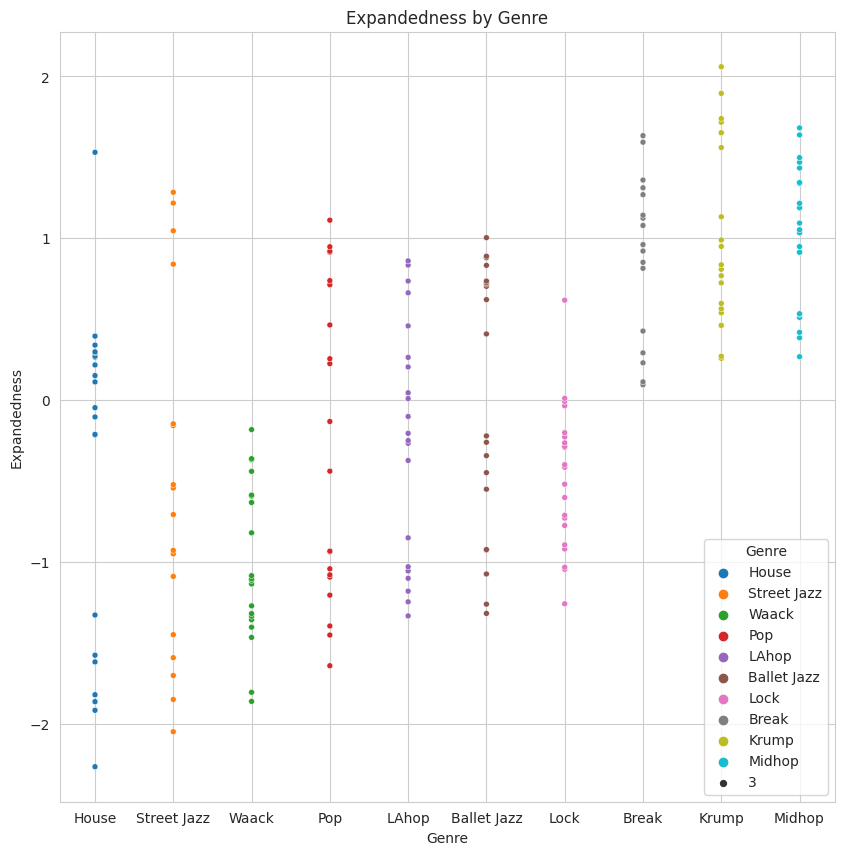

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
#scatter plot of Expandedness on y axis, dance genre on X axis, ordered by expandedness
sns.set_style('whitegrid')
plt.figure(figsize=(10,10))
sns.scatterplot(data=dfFM_scaled[['Expandedness', 'Genre']].sort_values(by='Expandedness'), x='Genre', y='Expandedness', hue='Genre', size=3)
plt.title('Expandedness by Genre')
plt.show()
sns.set_style('whitegrid')
plt.figure(figsize=(10,10))
#plt.savefig('../plots/Expandednessscatter.png')

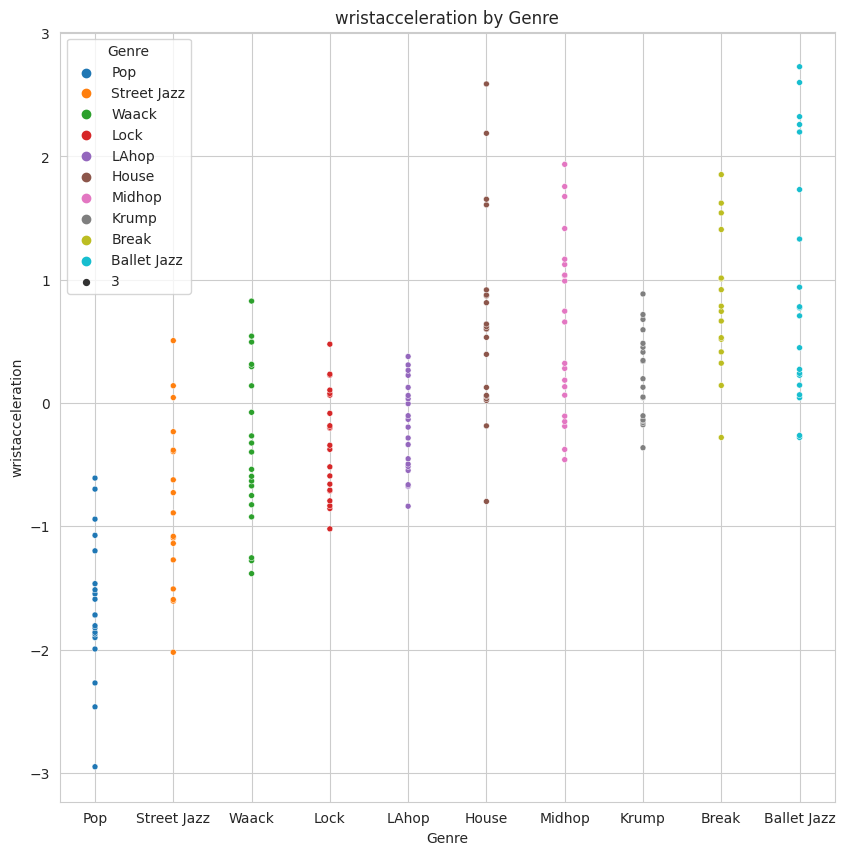

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
#scatter plot of wristacceleration on y axis, dance genre on X axis, ordered by wristacceleration
sns.set_style('whitegrid')
plt.figure(figsize=(10,10))
sns.scatterplot(data=dfFM_scaled[['wristacceleration', 'Genre']].sort_values(by='wristacceleration'), x='Genre', y='wristacceleration', hue='Genre', size=3)
plt.title('wristacceleration by Genre')
#plt.savefig('../plots/wristaccelerationscatter.png')
plt.show()


In [ ]:
# #drop id column and genre column
# dfFM.drop(['id', 'Genre'], axis=1, inplace=True)
# dfBM.drop(['id', 'Genre'], axis=1, inplace=True) 

/tmp/ipykernel_1431/567346436.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(dfBM_scaled.corr(), interpolation='nearest', fignum=1)


<function matplotlib.pyplot.show(close=None, block=None)>

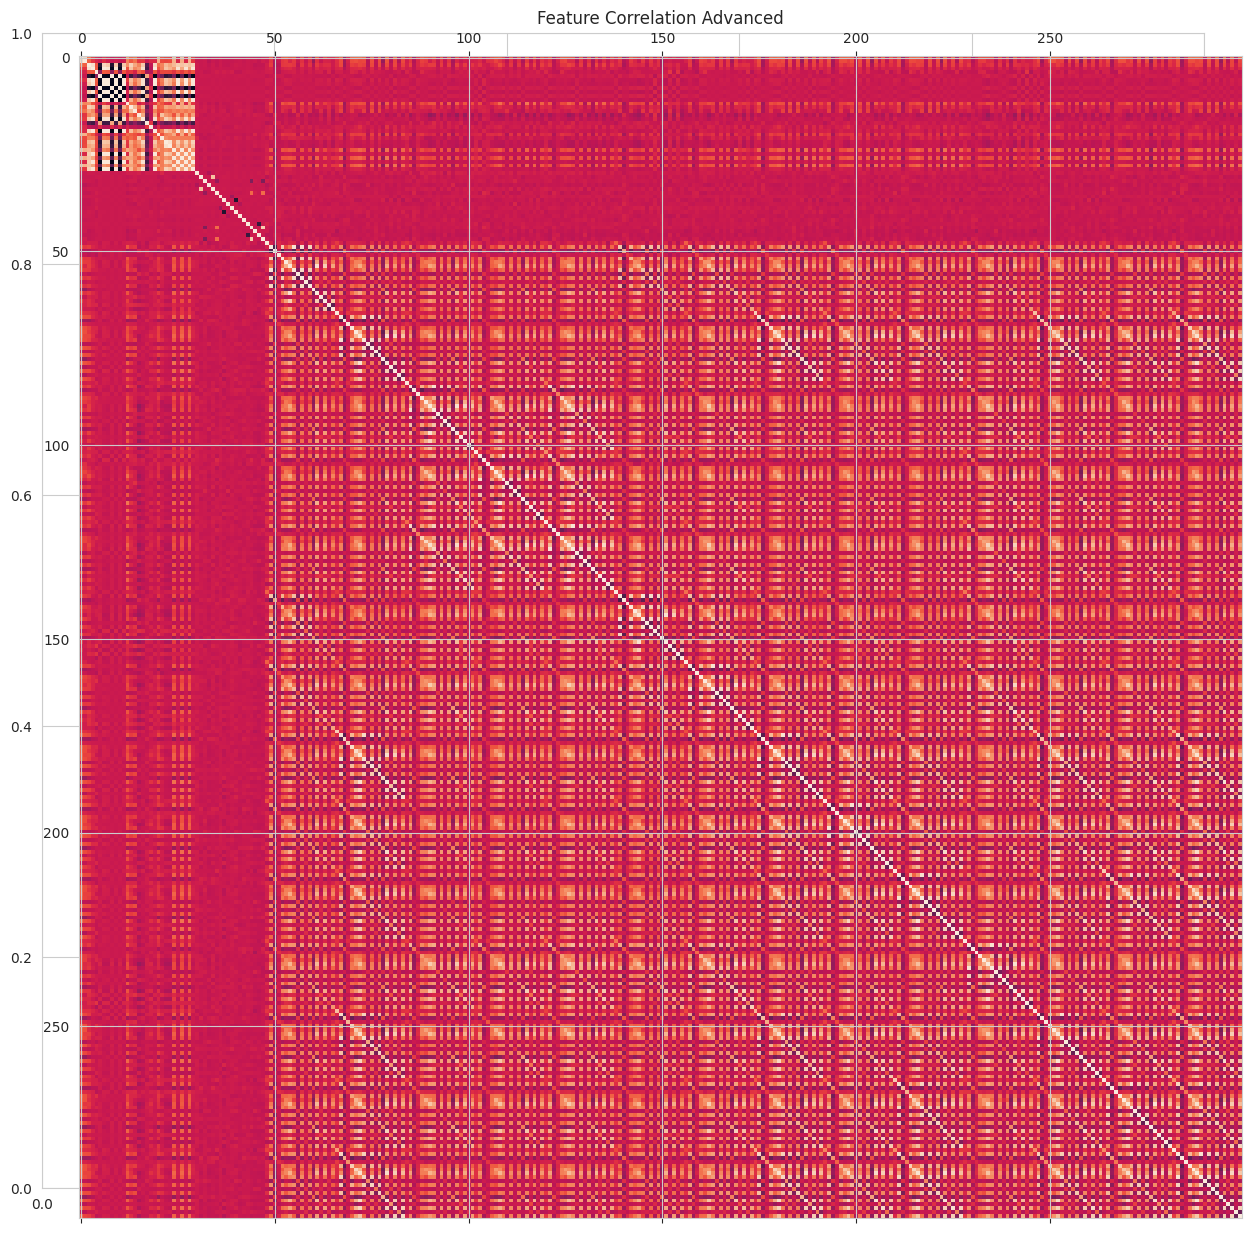

In [19]:
fig = plt.subplots(figsize=(15, 15))
plt.matshow(dfBM_scaled.corr(), interpolation='nearest', fignum=1)
plt.title('Feature Correlation Advanced')
plt.savefig('AdvFeatCorr_302.png')
plt.show

In [ ]:
#plot correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(dfFM_scaled.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

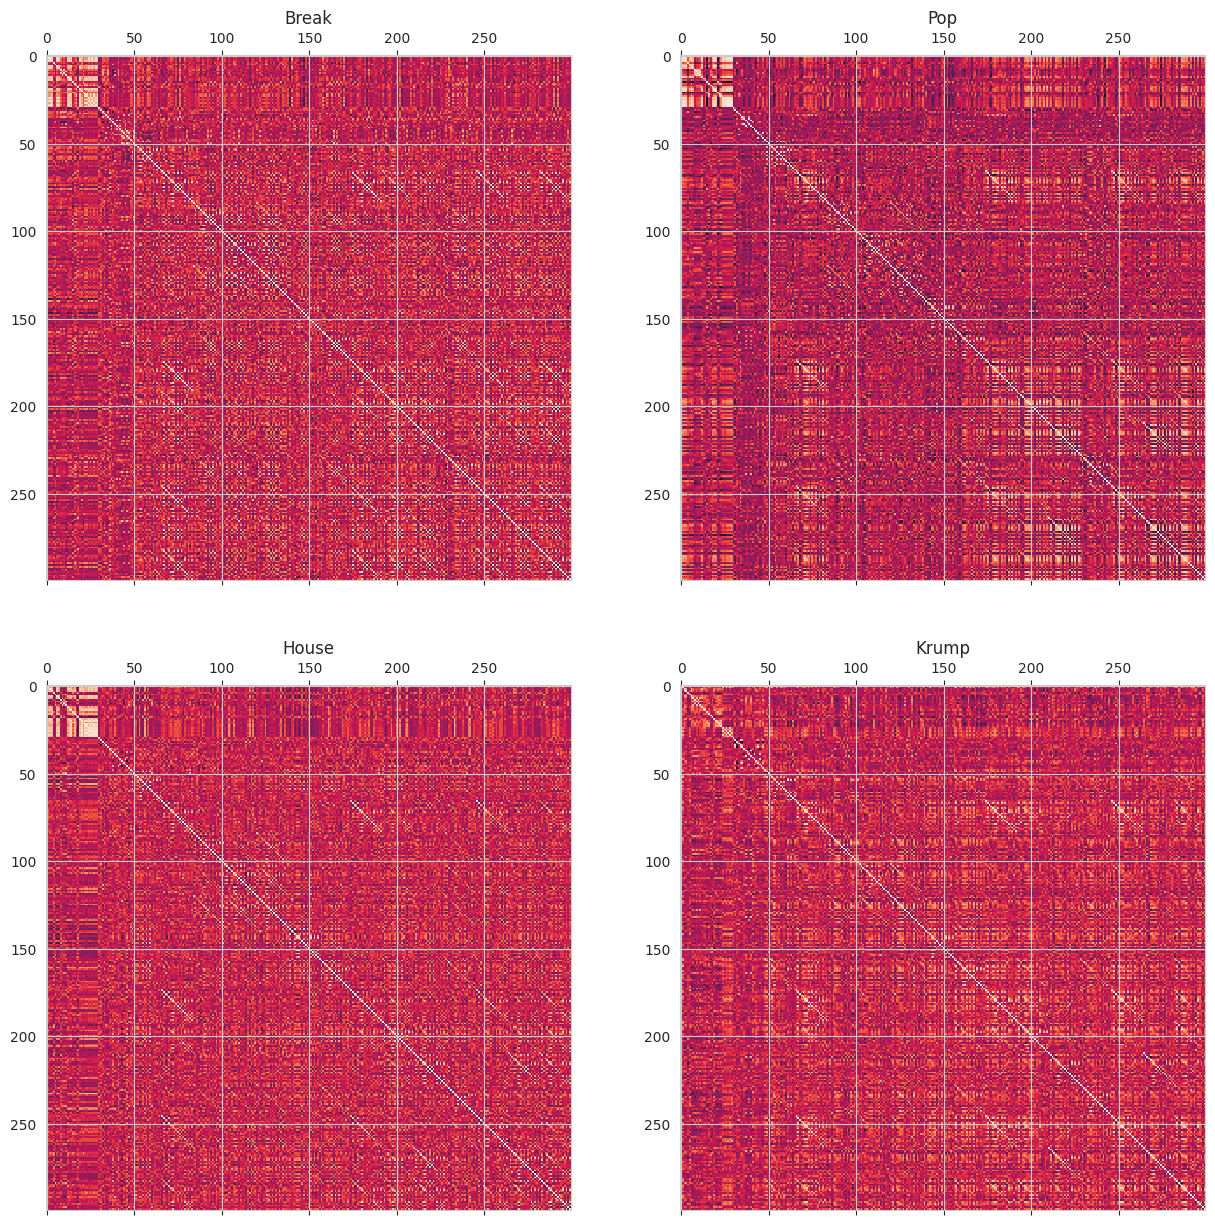

In [20]:
# two by two subplots of the correlation matrices for Break, Pop, House, Krump
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
axs[0, 0].matshow(dfABreak.corr())
axs[0, 0].set_title('Break')
axs[0, 1].matshow(dfAPop.corr())
axs[0, 1].set_title('Pop')
axs[1, 0].matshow(dfAHouse.corr())
axs[1, 0].set_title('House')
axs[1, 1].matshow(dfAKrump.corr())
axs[1, 1].set_title('Krump')
#plt.savefig('AdvFeatCorr_BreakPopHouseKrump.png')
#plt.savefig('AdvFeatCorr_BreakPopHouseKrump_sparse.png')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

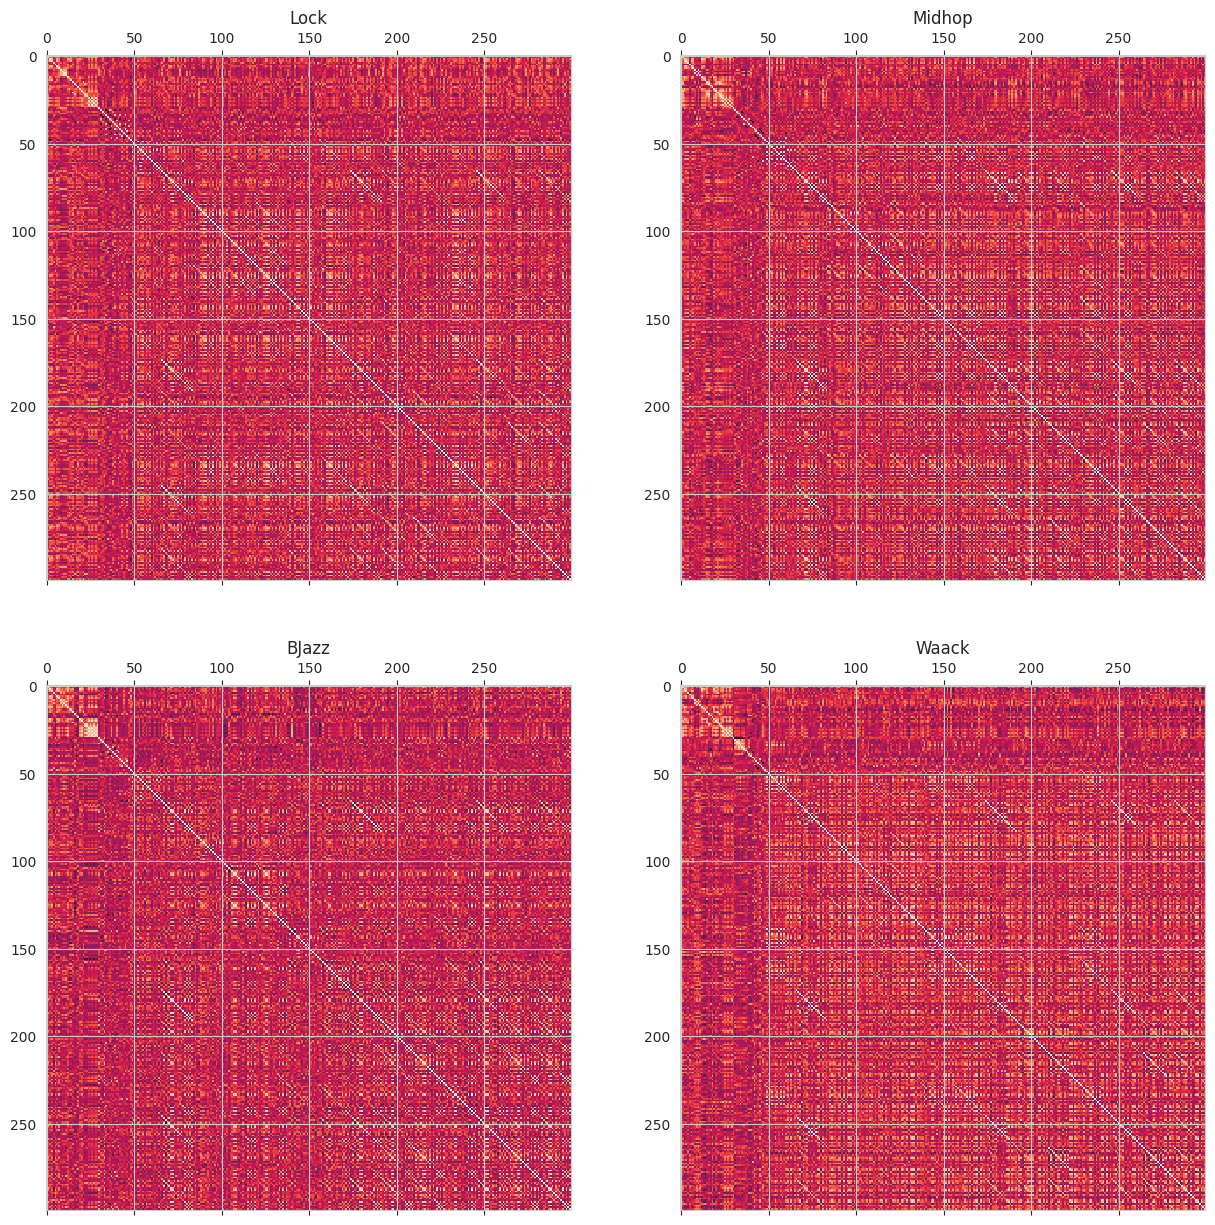

In [21]:
# two by two subplots of the correlation matrices for Lock, Midhop, BJazz, Waack, Basic
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
axs[0, 0].matshow(dfALock.corr())
axs[0, 0].set_title('Lock')
axs[0, 1].matshow(dfAMidhop.corr())
axs[0, 1].set_title('Midhop')
axs[1, 0].matshow(dfABJazz.corr())
axs[1, 0].set_title('BJazz')
axs[1, 1].matshow(dfAWaack.corr())
axs[1, 1].set_title('Waack')
plt.savefig('SparseCorr_LockMidhopBJazzWaack.png')
plt.show

In [ ]:
# two by two subplots of the correlation matrices for LAhop, SJazz, House, Krump
fig, axs = plt.subplots(1, 2, figsize=(10, 20))
axs[0].matshow(dfALAhop.corr())
axs[0].set_title('LAhop')
axs[1].matshow(dfASJazz.corr())
axs[1].set_title('SJazz')
plt.savefig('SpraseCorr_LAhopSJazz.png')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

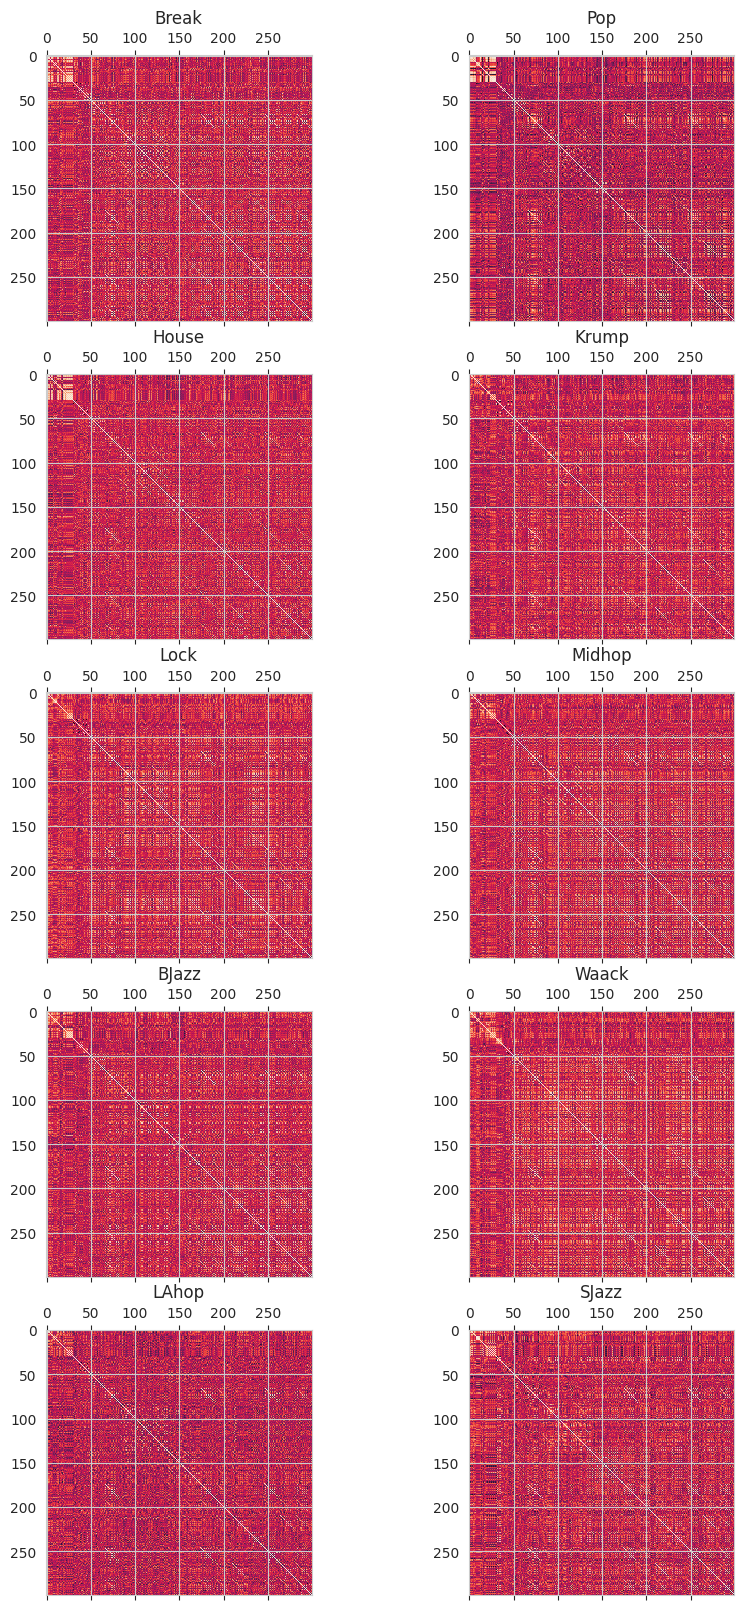

In [23]:
fig, axs = plt.subplots(5, 2, figsize=(10, 20))

axs[0, 0].matshow(dfABreak.corr())
axs[0, 0].set_title('Break')
axs[0, 1].matshow(dfAPop.corr())
axs[0, 1].set_title('Pop')
axs[1, 0].matshow(dfAHouse.corr())
axs[1, 0].set_title('House')
axs[1, 1].matshow(dfAKrump.corr())
axs[1, 1].set_title('Krump')
axs[2, 0].matshow(dfALock.corr())
axs[2, 0].set_title('Lock')
axs[2, 1].matshow(dfAMidhop.corr())
axs[2, 1].set_title('Midhop')
axs[3, 0].matshow(dfABJazz.corr())
axs[3, 0].set_title('BJazz')
axs[3, 1].matshow(dfAWaack.corr())
axs[3, 1].set_title('Waack')
axs[4, 0].matshow(dfALAhop.corr())
axs[4, 0].set_title('LAhop')
axs[4, 1].matshow(dfASJazz.corr())
axs[4, 1].set_title('SJazz')
#plt.savefig('featurecorr_genres_dense.png')
plt.show

In [32]:
#make df of features by genre
features = dfFM.columns.drop('id').drop('Genre')
features

Index(['wristacceleration', 'wristaccstd', 'ankleacceleration', 'ankleaccstd',
       'angularmomentumxz', 'angularmomentumy', 'angularmomentumxzstd',
       'angularmomentumystd', 'angularmomentumnose', 'angularmomentumnosestd',
       ...
       'peak2_ywrists', 'prominence2_ywrists', 'peak3_ywrists',
       'prominence3_ywrists', 'peak1_xzwrists', 'prominence1_xzwrists',
       'peak2_xzwrists', 'prominence2_xzwrists', 'peak3_xzwrists',
       'prominence3_xzwrists'],
      dtype='object', length=300)

In [33]:
#make df of features by genre
features = dfFM.columns.drop('Genre').drop('id')


featuresdf = pd.DataFrame(columns=dfFM['Genre'].unique(), index=features)
#remove genre row

for i, feature in enumerate(features):
    for genre in dfFM['Genre'].unique():
        featuresdf.iloc[i][genre] = dfFM[feature][dfFM['Genre']==genre].mean()

#  z scale columns of featuresdf
featuresdf_norm = featuresdf.to_numpy()
for i in range(len(featuresdf_norm)):
    featuresdf_norm[i] = (featuresdf_norm[i] - featuresdf_norm[i].mean())/featuresdf_norm[i].std()

featuresdf_norm = pd.DataFrame(featuresdf_norm, columns=featuresdf.columns, index=featuresdf.index)
featuresdf_norm.head()

Break       Pop      Lock    Midhop     LAhop     House  \
wristacceleration  1.067036 -2.088936 -0.410257  0.806022 -0.266538  0.865092   
wristaccstd        0.732493 -2.031023 -0.253707  0.272979 -0.683067   -0.2166   
ankleacceleration  1.592322 -1.305165 -0.371371  0.878738 -0.339117  1.425748   
ankleaccstd        1.756141 -1.471483 -0.314784   0.86791 -0.367587   0.90396   
angularmomentumxz -0.739714  0.269582 -1.159786  1.423057 -0.877557  1.891082   

                      Waack     Krump Street Jazz Ballet Jazz  
wristacceleration -0.457329  0.285974   -1.029614     1.22855  
wristaccstd       -0.522607  0.776503   -0.026698    1.951725  
ankleacceleration -0.828722 -0.469574    -1.19311     0.61025  
ankleaccstd       -0.873603 -0.261921   -1.140549    0.901916  
angularmomentumxz  0.038854 -1.229364   -0.004475     0.38832

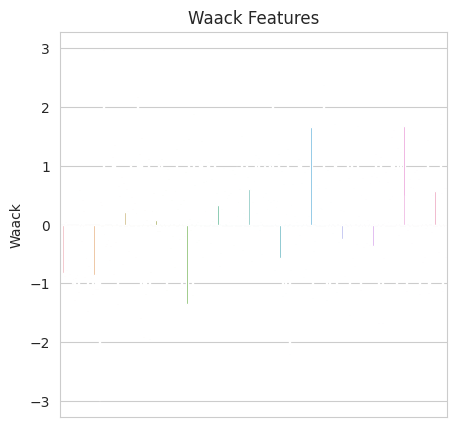

In [34]:
#bar plot of Waack, normalized features values 
sns.set_style('whitegrid')
plt.figure(figsize=(5,5))
sns.barplot(data=featuresdf_norm, x=featuresdf_norm.index, y='Waack')
#make xticks go away
plt.xticks([])
plt.title('Waack Features')
plt.savefig('../plots/feature_plots/Waackfeatures.png')
plt.show()